In [1]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import os
import codecs

# a) Magnetización

Buscamos el i de termalizacion

<Figure size 432x288 with 0 Axes>

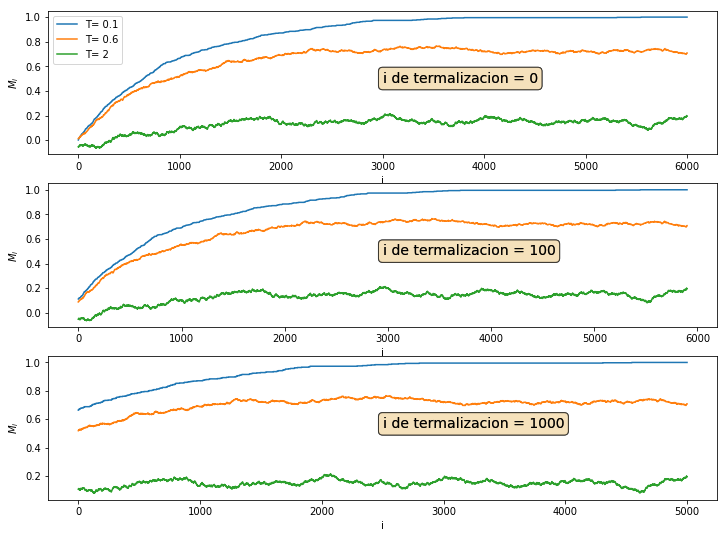

In [5]:
Datos = codecs.open('magnetizacion_iter=100000.txt','r','utf8').read().split('\n')
T=['0.1', '0.6', '2']
plt.figure()

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=1, nrows=3,figsize=(12, 9))
            
#primer caso no cortamos para la termalizacion
for j,data in enumerate([Datos[i] for i in [1,10,-2]]):
    data=[int(d)/30**2 for d in data.split(' ')[:-1]]
    data=data[:6000]
    ax0.plot(range(len(data)),data,label="T= " + T[j])
    ax0.legend(loc=2)
    ax0.set_xlabel(xlabel='i')
    ax0.set_ylabel(ylabel='$M_{i}$')
    plt.text(0.5, 0.5,"i de termalizacion = %i" %0,transform=ax0.transAxes, fontsize=14, bbox=props)

#segundo caso cortamos en 100
for j,data in enumerate([Datos[i] for i in [1,10,-2]]):
    data=[int(d)/30**2 for d in data.split(' ')[:-1]]
    data=data[100:6000]
    ax1.plot(range(len(data)),data)
    ax1.set_xlabel(xlabel='i')
    ax1.set_ylabel(ylabel='$M_{i}$')
    plt.text(0.5, 0.5,"i de termalizacion = %i" %100,transform=ax1.transAxes, fontsize=14, bbox=props)

    
#tercer caso cortamos en 1000
for j,data in enumerate([Datos[i] for i in [1,10,-2]]):
    data=[int(d)/30**2 for d in data.split(' ')[:-1]]
    data=data[1000:6000]
    ax2.plot(range(len(data)),data)
    ax2.set_xlabel(xlabel='i')
    ax2.set_ylabel(ylabel='$M_{i}$')
    plt.text(0.5, 0.5,"i de termalizacion = %i" %1000,transform=ax2.transAxes, fontsize=14, bbox=props)
    
plt.show()


Magnetizacion media con i_term=2500

C:\Users\lucio\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\lucio\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\lucio\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\lucio\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\lucio\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


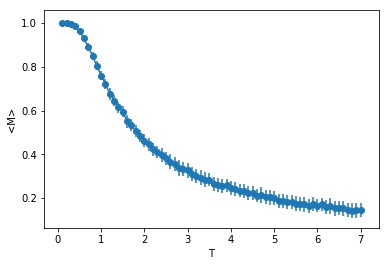

In [6]:
Datos = codecs.open('magnetizacion_iter=100000.txt','r','utf8').read().split('\n')
m=[]
Temps=[0.1]
error=[]
rango=[]
datos_sel=[]

for i,data in enumerate(Datos):
    data=[int(d)/30**2 for d in data.split(' ')[:-2]]
    data=data[2500:]
    m.append(np.mean(data))
    error.append(np.std(data))
    Temps.append(Temps[i]+0.1)
    
for i in range(0,len(m)):
    if abs(m[i]-0.2)<0.01:
        rango.append(Temps[i])
        datos_sel.append(m[i])
        break
        
#plt.plot(np.linspace(0,7),np.tanh(1/np.linspace(0,7)))
plt.figure()
ax=plt.subplot(111)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.errorbar(Temps[:-1], m, yerr=error)
plt.scatter(Temps[:-1],m)

#plt.axvspan(rango[0], rango[-1], color='red', linewidth='2',alpha=0.5)
#plt.axhspan(datos_sel[0], datos_sel[-1], color='red', linewidth='2', alpha=0.5)
#plt.text(0.69, 0.5,"$M_{term}$ = %0.3f" %datos_sel[0] +"\n$T_{term}$ = %0.1f" %rango[0],transform=ax.transAxes, fontsize=14, bbox=props)

plt.ylabel('<M>')
plt.xlabel('T')
plt.show()

# b) Energia y Magnetizacion (J)

In [2]:
def correlacion(ls,k): #La funcion calcula la correlacion entre los valores de ls a pasos k
    valores=[]
    for i,v in enumerate(ls[:-k]):
        valores.append((v*ls[i+k]));
    mean_ik= sum(valores)/len(ls[:-k])
    mean_i2=(np.mean(ls))**2
    disp=np.std(ls)
    
    res=(mean_ik - mean_i2 )/(disp**2)
    return res

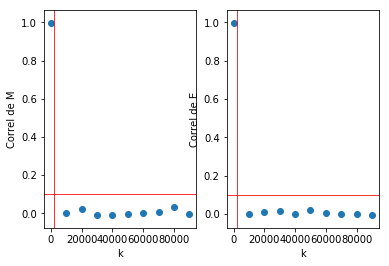

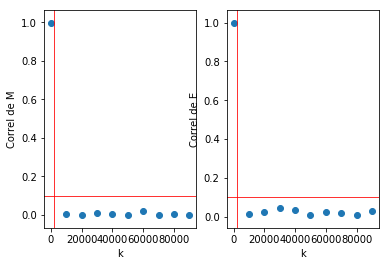

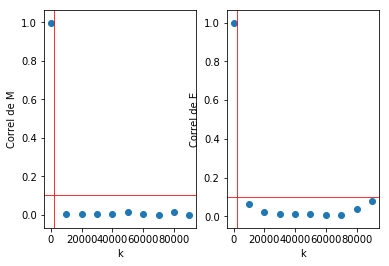

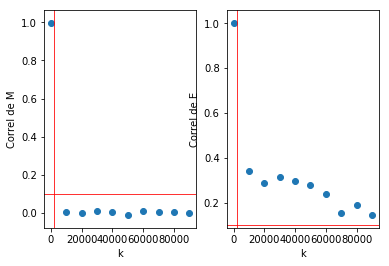

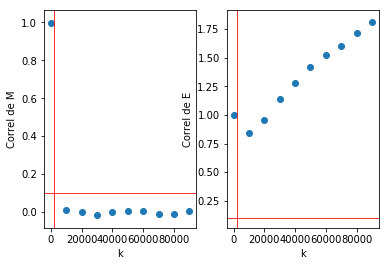

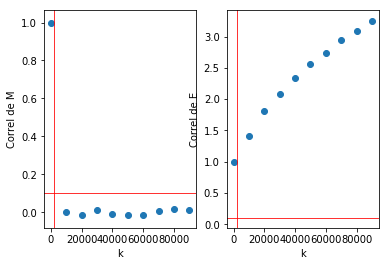

In [6]:
Datos = codecs.open('magnetizacion_J_iter=5000000.txt','r','utf8').read().split('\n')

error=[]
rango=[]
datos_sel=[]
M=[]
E=[]
iteraciones=5000000
for k in range(6):
    m=[]
    e=[]
    for i,data in enumerate(Datos[(iteraciones+1)*k:(iteraciones+1)*(k+1)-1]):
        #print(data.split(' '))
        m.append(float(data.split(' ')[0]))
        e.append(float(data.split(' ')[1]))
    M.append(m)
    E.append(e)
    T=np.linspace(1,iteraciones,iteraciones)
    
    
for j in range(6):
    CKM=[]
    CKE=[]
    for k in range(1,100000,10000):
        ckm=correlacion(M[j],k)
        cke=correlacion(E[j],k)
        CKM.append(ckm)
        CKE.append(cke)
    plt.subplot(121)
    plt.scatter(range(1,100000,10000),CKM)
    plt.ylabel('Correl de M')
    plt.xlabel('k')
    plt.axvline(2000, color='red', alpha=0.8, linestyle='-',linewidth=1) #Para L=4
    plt.axhline(0.1, color='red', alpha=0.8, linestyle='-',linewidth=1) #Para L=4
    plt.subplot(122)
    plt.scatter(range(1,100000,10000),CKE)
    plt.ylabel('Correl de E')
    plt.xlabel('k')
    plt.axvline(2000, color='red', alpha=0.8, linestyle='-',linewidth=1) #Para L=4
    plt.axhline(0.1, color='red', alpha=0.8, linestyle='-',linewidth=1) #Para L=4

    #plt.subplot(212)
    #plt.scatter(range(1,10000,100),CKE)
    #plt.ylabel('Correl de E')
    #plt.xlabel('iteracion')
    plt.show()

In [36]:
Datos = codecs.open('magnetizacion_J_iter=1000000.txt','r','utf8').read().split('\n')

error=[]
rango=[]
datos_sel=[]
M=[]
E=[]
iteraciones=1000000
for k in range(6):
    m=[]
    e=[]
    for i,data in enumerate(Datos[(iteraciones+1)*k:(iteraciones+1)*(k+1)-1]):
        #print(data.split(' '))
        m.append(float(data.split(' ')[0]))
        e.append(float(data.split(' ')[1]))
    M.append(m)
    E.append(e)
    T=np.linspace(1,iteraciones,iteraciones)
    
    
for j in range(6):
    CKM=[]
    CKE=[]
    for k in range(1,3000,100):
        ckm=correlacion(M[j],k)
        cke=correlacion(E[j],k)
        CKM.append(ckm)
        CKE.append(cke)
        
    print(np.mean(CKM))

0.1752789726877382
0.1884245917824602
0.16173272011883436
0.14917791230739602
0.1375896879951296
0.16776119371695383


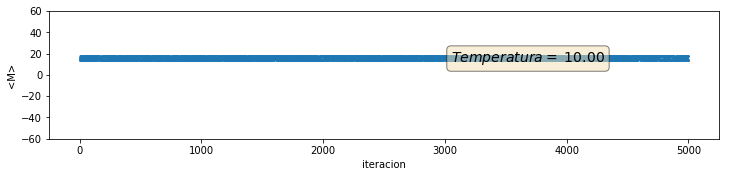

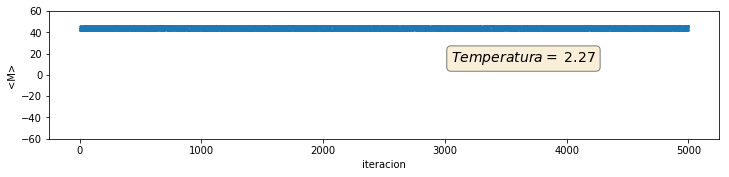

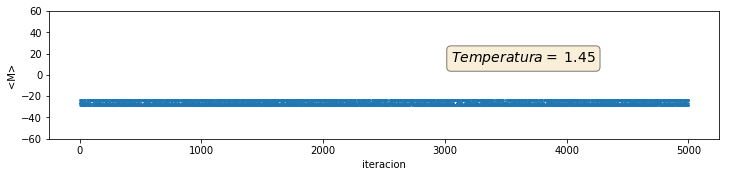

In [12]:
#Habiendo visto los graficos de la magnetizacion para iter=100000 vimos que la termalizacion se alcanzaba al rededor 
#de la iteración 2000, entonces a partir de eso tomamos cada 2000 iteraciones los valores e hicimos 100000000

Datos = codecs.open('magnetizacion_J_iter=10000000.txt','r','utf8').read().split('\n')

error=[]
rango=[]
datos_sel=[]
M=[]
E=[]

#la cantidad de datos que tomamos fueron 10000000/2000=5000 +1 que es el inicial 
#y lo hicimos para 60 J's eso son unos 305061 datos
cantidad=5001;
for k in range(60):
    m=[]
    e=[]
    
    for i,data in enumerate(Datos[((cantidad)*k):((cantidad)*(k+1))-1]):
        m.append(float(data.split(' ')[0]))
        e.append(float(data.split(' ')[1]))
    M.append(m)
    E.append(e)
    iteracion=np.linspace(1,cantidad-1,cantidad-1)
    

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

T=[10, 2.27, 1.45]
pos=[0,34,59]

for i, pos in enumerate(pos):
    fig=plt.figure(figsize=(12, 8))
    posicion=311+i
    ax=plt.subplot(posicion)
    ax.set_ylim([-60, 60])
    plt.scatter(iteracion,M[i],s=2)
    plt.ylabel('<M>')
    plt.xlabel('iteracion')
    plt.text(0.6, 0.6,"$Temperatura=$ %0.2f" %T[i],transform=ax.transAxes, fontsize=14, bbox=props)

    plt.show()


In [18]:
iteraciones=int(10000000/2000)-1
Datos = codecs.open('magnetizacion_J_iter=10000000.txt','r','utf8').read().split('\n')

error=[]
rango=[]
datos_sel=[]
M=[]
E=[]

for k in range(6):
    m=[]
    e=[]
    
    print(k)
    for i,data in enumerate(Datos[(iteraciones+4)*k+3:(iteraciones+4)*(k+1)-1]):
        #print(data.split(' '))
        m.append(float(data.split(' ')[0]))
        e.append(float(data.split(' ')[1]))
    M.append(m)
    E.append(e)
    T=np.linspace(1,iteraciones,100000)
    plt.subplot(121)
    plt.scatter(T,m,s=2)
    plt.ylabel('<M>')
    plt.xlabel('T')
    plt.subplot(122)
    plt.scatter(T,e,s=2)
    plt.ylabel('<e>')
    plt.xlabel('T')        
    plt.show()

60


In [19]:
len(Datos)

305123